In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
path='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(path)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [29]:
data.shape()

TypeError: 'tuple' object is not callable

In [30]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


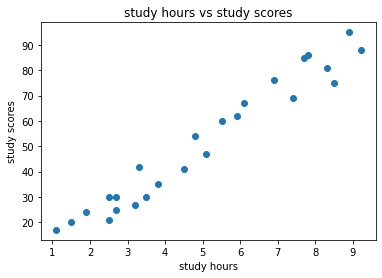

In [31]:
plt.scatter(x=data.Hours,y=data.Scores)
plt.xlabel('study hours')
plt.ylabel('study scores')
plt.title('study hours vs study scores')
plt.show()

In [15]:
#data cleaning 
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [32]:
#split dataset for training
x=data.drop("Scores",axis="columns")
y=data.drop("Hours",axis="columns")
print("shape of x",x.shape)
print("shape of y",y.shape)

shape of x (25, 1)
shape of y (25, 1)


In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=51)
#test_size is defining how much data we want for testing so 0.2 means 20 percent data for testing

In [18]:
print("shape of x train",x_train.shape)
print("shape of y train",y_train.shape)
print("shape of x test",x_test.shape)
print("shape of y test",x_test.shape)

shape of x train (20, 1)
shape of y train (20, 1)
shape of x test (5, 1)
shape of y test (5, 1)


In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

In [21]:
lr.coef_

array([[9.56433743]])

In [22]:
lr.intercept_

array([2.70197068])

In [23]:
lr.predict([[4]])[0][0].round(2)

40.96

In [33]:
y_pred=lr.predict(x_test)
y_pred

array([[55.30582657],
       [76.34736893],
       [68.69589898],
       [82.08597139],
       [28.52568176]])

In [34]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=["study_hours","student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.5,60.0,55.305827
1,7.7,85.0,76.347369
2,6.9,76.0,68.695899
3,8.3,81.0,82.085971
4,2.7,30.0,28.525682


In [35]:
lr.score(x_test,y_test)
#accuracy of our model

0.9238518102278777

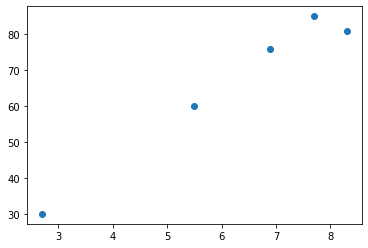

In [36]:
plt.scatter(x_test,y_test)

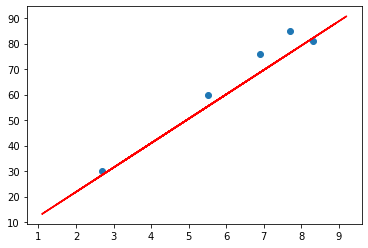

In [37]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color="red")

In [38]:
import joblib
joblib.dump(lr,"student_marks_predictor.pkl")

['student_marks_predictor.pkl']

In [39]:
model= joblib.load("student_marks_predictor.pkl")

In [40]:
model.predict([[5]])

array([[50.52365786]])